<a href="https://colab.research.google.com/github/Prakhosha/DCNN-text-classification/blob/master/DCNN_textclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perbandingan Klasifikasi Angka dan Huruf antara Deep Convolutional Neural Network dan Shallow Network**

Angga Bayu Prakhosha - 13316023

## Pendahuluan

Dalam notebook ini akan dilakukan klasifikasi angka dan huruf ke dalam 20 kelas menggunakan deep convolutional neural network (DCNN) dan shallow network. Tujuan dari projek ini adalah:

1. Membandingkan kecepatan training model DCNN dengan model shallow network
2. Membandingkan kecepatan prediksi model DCNN dengan model shallow network
3. Membandingkan akurasi model DCNN dengan model shallow network
4. Membandingkan ukuran model DCNN dengan model shallow network

Metodologi:

1. Kecepatan training dihitung dengan menggunakan library time pada python dan dimulai sebelum training dan berakhir setelah training selesai

2. Kecepatan prediksi dihitung dengan menggunakan library time pada python dan dimulai sebelum prediksi dan berakhir setelah prediksi selesai

3. Akurasi model dihitung dengan membandingkan akurasi pada data validasi

4. Ukuran model dihitung dari jumlah parameter yang digunakan model

Spesifikasi model:

1. Model DCNN yang digunakan terdiri dari 7 layer dengan 3 layer konvolusi
2. Model shallow network yang digunakan terdiri dari 1 layer dengan jumlah perceptron 1024

Data:
Data diambil dengan menggabungkan dataset angka dan 10 huruf pertama huruf EMINST  
link: https://www.nist.gov/itl/products-and-services/emnist-dataset

## Pembuatan Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd gdrive/

/content/gdrive


In [ ]:
cd My\ Drive

/content/gdrive/My Drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import datetime
import time
!pip install emnist

In [ ]:
from emnist import list_datasets
from emnist import extract_training_samples
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [ ]:
from emnist import extract_training_samples
from emnist import extract_test_samples

numbers, numbers_label = extract_training_samples('digits')
letters, letters_label = extract_training_samples('letters')

letters = np.array(letters[np.argwhere(letters_label <= 10),:,:])
letters = np.squeeze(letters, axis=1)

letters_label = letters_label[np.argwhere(letters_label <= 10)]
letters_label = np.squeeze(letters_label, axis=1)
letters_label = letters_label+9

val_numbers, val_numbers_label = extract_test_samples('digits')
val_letters, val_letters_label = extract_test_samples('letters')

val_letters = np.array(val_letters[np.argwhere(val_letters_label <= 10),:,:])
val_letters = np.squeeze(val_letters, axis=1)


val_letters_label = val_letters_label[np.argwhere(val_letters_label <= 10)]
val_letters_label = np.squeeze(val_letters_label, axis=1)
val_letters_label = val_letters_label+9

data_training = tf.concat([numbers, letters], axis=0)
data_validation = tf.concat([val_numbers, val_letters], axis=0)

data_training = tf.reshape(data_training, [-1, 28, 28, 1])
data_validation = tf.reshape(data_validation, [-1, 28, 28, 1])

data_training_label = tf.concat([numbers_label, letters_label], axis=0)
data_validation_label = tf.concat([val_numbers_label, val_letters_label], axis=0)

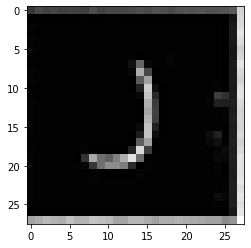

In [ ]:
from os import listdir
from PIL import Image as PImage, ImageOps
from numpy import asarray

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = ImageOps.invert(PImage.open(path + "/" + image).convert('L'))
        img = img.resize((28,28))
        img = asarray(img)
        loadedImages.append(img)

    return loadedImages

path = "Gambar"
imgs = loadImages(path)
# your images in an array

gambar= []

for img in imgs:
    # you can show every image
    plt.imshow(img, cmap='gray')
    #print(np.shape(img))
    gambar.append(img[:,:])

gambar = np.array(gambar)
gambar = gambar.reshape(-1, 28, 28, 1)

In [ ]:
IMG_HEIGHT = 28
IMG_WIDTH = 28

model1 = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(20)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(20)
])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_9 (Dense)              (None, 20)                20500     
Total params: 824,340
Trainable params: 824,340
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto') 
best_model_filename='Siscer\bobot_tugas_4shallow.{epoch:02d}-{val_loss:.2f}.h5'   
best_model = tf.keras.callbacks.ModelCheckpoint(best_model_filename, monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
batch_size=64
epochs=20
total_train = np.size(data_training, 0)
total_val = np.size(data_validation, 0)

In [ ]:
start = time.time()

history1 = model1.fit(
    x = data_training,
    y = data_training_label,
    steps_per_epoch= total_train // batch_size,
    verbose = 1,
    epochs=epochs,
    validation_data=(data_validation, data_validation_label),
    validation_steps=total_val // batch_size,
    callbacks=[best_model, early_stopping]
)

end = time.time()

waktu1 = end-start

Epoch 1/20
4490/4500 [============================>.] - ETA: 0s - loss: 0.3941 - accuracy: 0.8994
Epoch 00001: val_accuracy improved from -inf to 0.94125, saving model to Siscerobot_tugas_4.01-0.19.h5
4500/4500 [==============================] - 20s 4ms/step - loss: 0.3936 - accuracy: 0.8995 - val_loss: 0.1912 - val_accuracy: 0.9413
Epoch 2/20
4499/4500 [============================>.] - ETA: 0s - loss: 0.1629 - accuracy: 0.9493
Epoch 00002: val_accuracy improved from 0.94125 to 0.95219, saving model to Siscerobot_tugas_4.02-0.16.h5
4500/4500 [==============================] - 21s 5ms/step - loss: 0.1629 - accuracy: 0.9493 - val_loss: 0.1558 - val_accuracy: 0.9522
Epoch 3/20
4488/4500 [============================>.] - ETA: 0s - loss: 0.1393 - accuracy: 0.9562
Epoch 00003: val_accuracy improved from 0.95219 to 0.95617, saving model to Siscerobot_tugas_4.03-0.14.h5
4500/4500 [==============================] - 20s 4ms/step - loss: 0.1393 - accuracy: 0.9562 - val_loss: 0.1437 - val_acc

In [ ]:
start = time.time()

history2 = model2.fit(
    x = data_training,
    y = data_training_label,
    steps_per_epoch= total_train // batch_size,
    verbose = 1,
    epochs=epochs,
    validation_data=(data_validation, data_validation_label),
    validation_steps=total_val // batch_size,
    callbacks=[best_model, early_stopping]
)

end = time.time()

waktu2 = end-start

Epoch 1/20
4490/4500 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.8699
Epoch 00001: val_accuracy improved from -inf to 0.88213, saving model to Siscerobot_tugas_4shallow.01-0.47.h5
4500/4500 [==============================] - 14s 3ms/step - loss: 0.5462 - accuracy: 0.8700 - val_loss: 0.4720 - val_accuracy: 0.8821
Epoch 2/20
4482/4500 [============================>.] - ETA: 0s - loss: 0.4740 - accuracy: 0.8831
Epoch 00002: val_accuracy improved from 0.88213 to 0.88779, saving model to Siscerobot_tugas_4shallow.02-0.47.h5
4500/4500 [==============================] - 14s 3ms/step - loss: 0.4744 - accuracy: 0.8831 - val_loss: 0.4676 - val_accuracy: 0.8878
Epoch 3/20
4493/4500 [============================>.] - ETA: 0s - loss: 0.4591 - accuracy: 0.8875
Epoch 00003: val_accuracy did not improve from 0.88779
4500/4500 [==============================] - 14s 3ms/step - loss: 0.4590 - accuracy: 0.8874 - val_loss: 0.4865 - val_accuracy: 0.8837
Epoch 4/20
4498/4500 [==

## Hasil

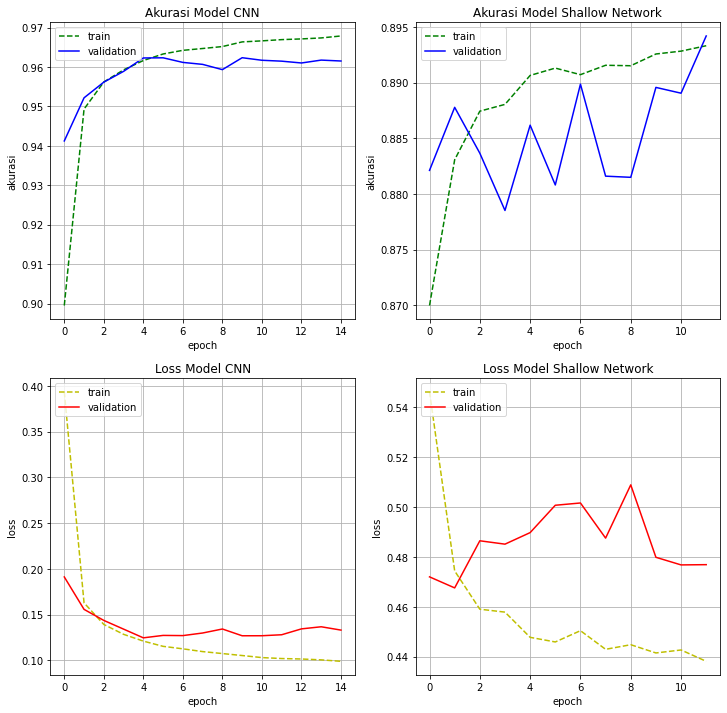

Waktu yang dibutuhkan untuk training model CNN: 301.4584038257599
Waktu yang dibutuhkan untuk training model shallow network: 166.54049682617188


In [ ]:
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(history1.history['accuracy'], linestyle='--', color='g')
plt.plot(history1.history['val_accuracy'], linestyle='-', color='b')
plt.title('Akurasi Model CNN')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()

plt.subplot(2,2,2)
plt.plot(history2.history['accuracy'], linestyle='--', color='g')
plt.plot(history2.history['val_accuracy'], linestyle='-', color='b')
plt.title('Akurasi Model Shallow Network')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()

# summarize history for loss
plt.subplot(2,2,3)
plt.plot(history1.history['loss'], linestyle='--', color='y')
plt.plot(history1.history['val_loss'], linestyle='-', color='r')
plt.title('Loss Model CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()

plt.subplot(2,2,4)
plt.plot(history2.history['loss'], linestyle='--', color='y')
plt.plot(history2.history['val_loss'], linestyle='-', color='r')
plt.title('Loss Model Shallow Network')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

print('Waktu yang dibutuhkan untuk training model CNN: ' + str(waktu1))
print('Waktu yang dibutuhkan untuk training model shallow network: ' + str(waktu2))

In [ ]:
start1 = time.time()
model1.predict(gambar)
end1 = time.time()

start2 = time.time()
model2.predict(gambar)
end2 = time.time()

waktu1 = end1-start1
waktu2 = end2-start2

print('Waktu yang dibutuhkan model CNN untuk memprediksi: ' + str(waktu1))
print('Waktu yang dibutuhkan model shallow network untuk memprediksi: ' + str(waktu2))

Waktu yang dibutuhkan model CNN untuk memprediksi: 0.2582845687866211
Waktu yang dibutuhkan model shallow network untuk memprediksi: 0.05880570411682129


In [ ]:
model1.save('model1')
model2.save('model2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model1/assets
INFO:tensorflow:Assets written to: model2/assets


## Pembahasan

1. Dari keluaran training baik model DCNN maupun shallow network didapat bahwa kecepatan training model DCNN lebih cepat dibanding kecepatan training model shallow network. Kecepatan training model DCNN terhitung sebesar 301.4584038257599 sedangkan kecepatan training model shallow network sebesar 166.54049682617188. Hal ini membuktikan DCNN lebih cepat dalam hal training data dibanding shallow network.

2. Dari keluaran prediksi baik model DCNN maupun shallow network didapat bahwa kecepatan prediksi model DCNN lebih cepat dibanding kecepatan prediksi model shallow network. Kecepatan prediksi model DCNN terhitung sebesar 0.2582845687866211 sedangkan kecepatan prediksi model shallow network sebesar 0.05880570411682129. Hal ini menunjukkan DCNN lebih cepat dalam memprediksi data dibanding shallow network.

3. Graik plot training menunjukkan akurasi model DCNN lebih besar dibanding akurasi model shallow network. Akurasi validasi model DCNN didapat sebesar 0.9615 sedangkan akurasi model shallow network sebesar 0.8942. Hal ini menunjukkan DCNN lebih akurat dibanding shallow network.

4. _*Summary()*_ kedua model menunjukkan jumlah parameter yang digunakan baik model DCNN maupun model shallow network. Didapatkan bahwa dengan jumlah layer 8 dengan 3 diantaranya merupakan layer konvolusi, DCNN menggunakan 25,684 parameter. Di sisi lain shallow network 1 layer 1024 perceptron menggunakan 824,340 parameter. Hal ini menunjukkan DCNN menggunakan parameter yang lebih sedikit dibanding shallow network. Oleh karena itu ukuran penyimpanan DCNN lebih sedikit dibanding shallow network.

**Keempat hasil tersebut menunjukkan bahwa DCNN lebih baik digunakan untuk mengklasifikasi data angka dan 10 huruf pertama data EMNIST**.